Mounted at /content/drive
['fear_greed_index.csv', 'historical_data.csv', 'cleaned_trader_data.gsheet', 'cleaned_sentiment_data.csv', 'cleaned_trader_data.csv']

📊 Leverage & PnL Summary by Sentiment:
               estimated_leverage                             closed_pnl  \
                             mean           std           max       mean   
classification                                                             
Extreme Fear         3.218852e+10  3.815787e+11  7.872160e+12     120.73   
Extreme Greed        3.218852e+10  3.815791e+11  7.872160e+12     120.73   
Fear                 3.218852e+10  3.815784e+11  7.872160e+12     120.73   
Greed                3.218852e+10  3.815785e+11  7.872160e+12     120.73   
Neutral              3.218852e+10  3.815789e+11  7.872160e+12     120.73   

                                      
                   std  min      max  
classification                        
Extreme Fear    491.76  0.0  7047.86  
Extreme Greed   491.76  0.0  7047.

/tmp/ipython-input-1-2650741193.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='estimated_leverage', palette='coolwarm')


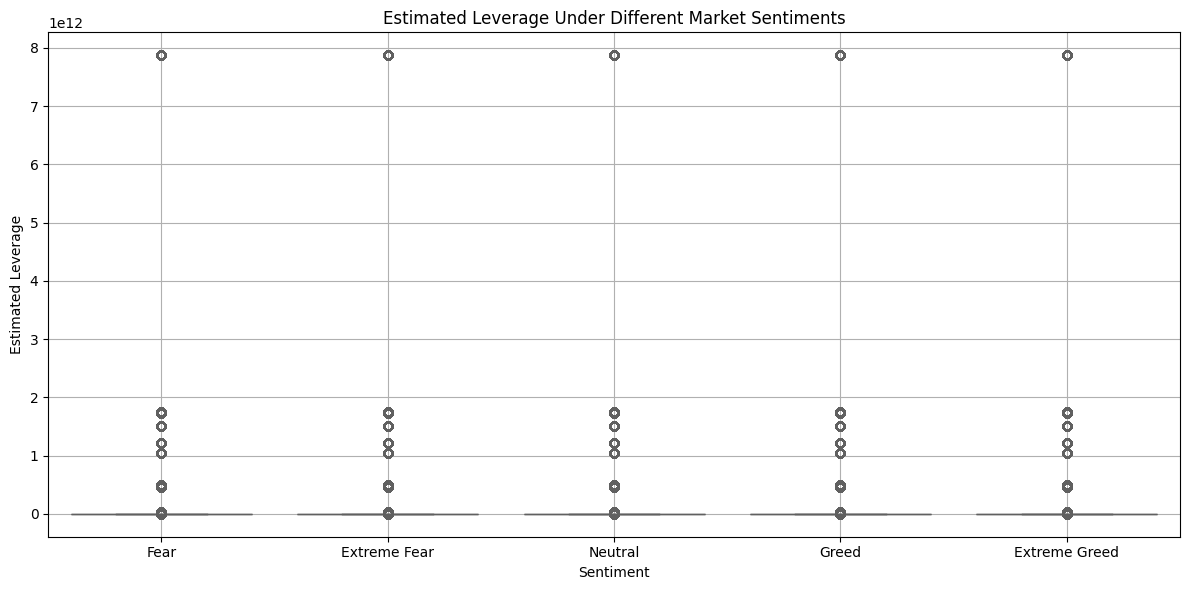

/tmp/ipython-input-1-2650741193.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='vlag')


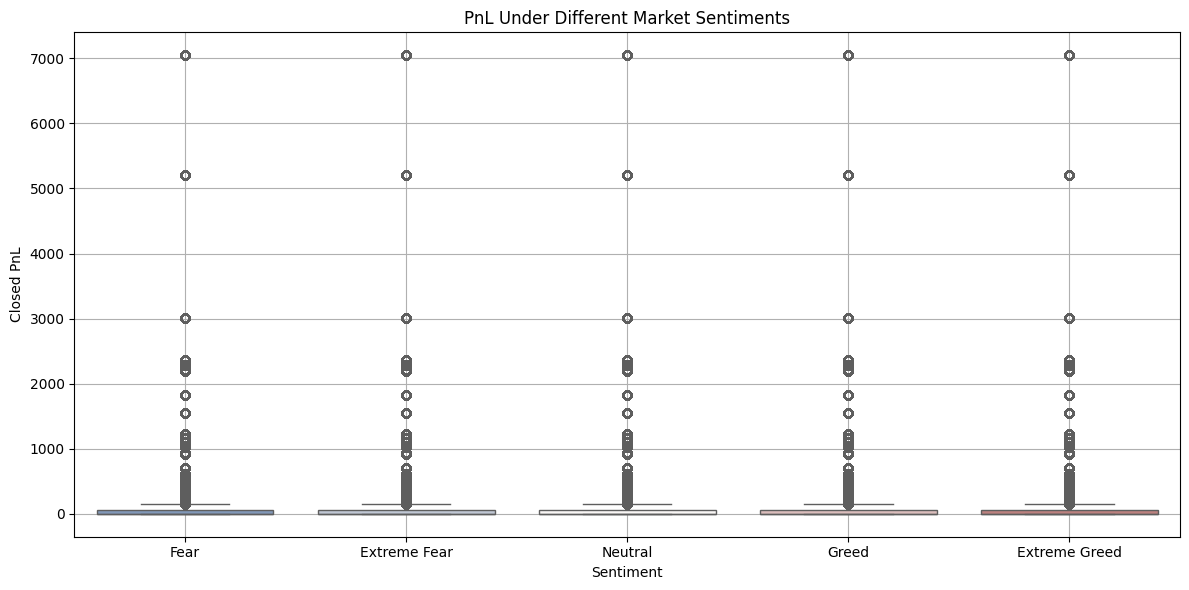

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

#  Check available files
print(os.listdir('/content/drive/MyDrive/ds_mahek/csv_files'))

# Load trader and sentiment data
trader_df = pd.read_csv('/content/drive/MyDrive/ds_mahek/csv_files/cleaned_trader_data.csv', nrows=500)
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_mahek/csv_files/cleaned_sentiment_data.csv')

# Normalize column names (strip spaces, lowercase, underscores)
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Merge datasets on common 'date' column
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')

#  Estimate leverage using size and start_position (avoid divide-by-zero with 1e-9)
merged_df['estimated_leverage'] = merged_df['size_usd'] / (merged_df['start_position'].abs() + 1e-9)

#  Clean dataset by removing NaNs and Infs
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
merged_df = merged_df.dropna(subset=['estimated_leverage', 'closed_pnl', 'classification'])

# Group by sentiment and summarize leverage and PnL stats
summary = merged_df.groupby('classification').agg({
    'estimated_leverage': ['mean', 'std', 'max'],
    'closed_pnl': ['mean', 'std', 'min', 'max']
}).round(2)

print("\n📊 Leverage & PnL Summary by Sentiment:")
print(summary)

#  Set output path
output_dir = '/content/drive/MyDrive/ds_mahek/outputs'


# Visualize Estimated Leverage by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='estimated_leverage', palette='coolwarm')
plt.title("Estimated Leverage Under Different Market Sentiments")
plt.ylabel("Estimated Leverage")
plt.xlabel("Sentiment")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'leverage_by_sentiment.png'))
plt.show()

# Visualize PnL by Sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='vlag')
plt.title("PnL Under Different Market Sentiments")
plt.ylabel("Closed PnL")
plt.xlabel("Sentiment")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'pnl_by_sentiment.png'))
plt.show()
